In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 [==============================] - 0s 0us/step
404
102


In [3]:
mean = train_data.mean(axis = 0)
train_data -= mean

std = train_data.std(axis = 0)
train_data /= std

mean = test_data.mean(axis=0)
std = test_data.std(axis=0)
test_data -= mean
test_data /= std

In [4]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [5]:
history = model.fit(train_data, train_labels, epochs=30, batch_size=16, validation_split=0.2)


Epoch 1/30
21/21 [==============================] - 1s 16ms/step - loss: 162.3558 - mae: 9.3206 - val_loss: 106.3907 - val_mae: 7.1234
Epoch 2/30
21/21 [==============================] - 0s 3ms/step - loss: 79.9902 - mae: 6.5154 - val_loss: 140.8712 - val_mae: 8.9708
Epoch 3/30
21/21 [==============================] - 0s 3ms/step - loss: 78.7889 - mae: 6.3796 - val_loss: 122.3988 - val_mae: 8.2931
Epoch 4/30
21/21 [==============================] - 0s 3ms/step - loss: 67.6765 - mae: 5.8964 - val_loss: 94.1007 - val_mae: 6.7529
Epoch 5/30
21/21 [==============================] - 0s 4ms/step - loss: 57.3764 - mae: 5.3588 - val_loss: 63.9402 - val_mae: 5.2822
Epoch 6/30
21/21 [==============================] - 0s 5ms/step - loss: 53.8078 - mae: 5.2699 - val_loss: 79.1851 - val_mae: 6.5654
Epoch 7/30
21/21 [==============================] - 0s 3ms/step - loss: 49.2629 - mae: 5.0966 - val_loss: 67.5944 - val_mae: 5.7650
Epoch 8/30
21/21 [==============================] - 0s 3ms/step - loss:

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7112\2438909638.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


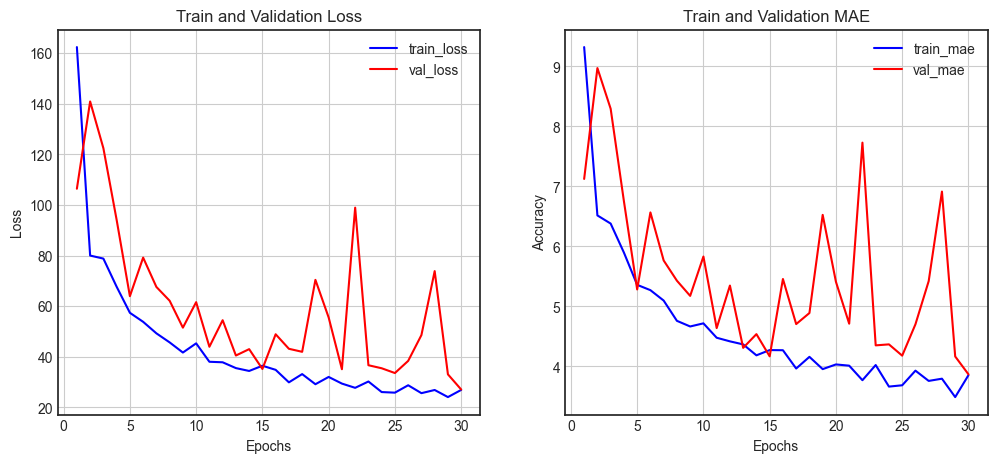

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [7]:
test_loss, test_mae = model.evaluate(test_data, test_labels)


4/4 [==============================] - 0s 2ms/step - loss: 5765.7808 - mae: 73.6199
